<a href="https://colab.research.google.com/github/RubaHesham11/Recognition-of-the-handwritten-digits/blob/main/Recognition_of_the_handwritten_digits__deep_neural_networks(keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [9]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt


In [10]:
# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as numpy arrays)
X = optical_recognition_of_handwritten_digits.data.features.to_numpy()
y = optical_recognition_of_handwritten_digits.data.targets.to_numpy()



In [11]:
X = X/16

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [13]:

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



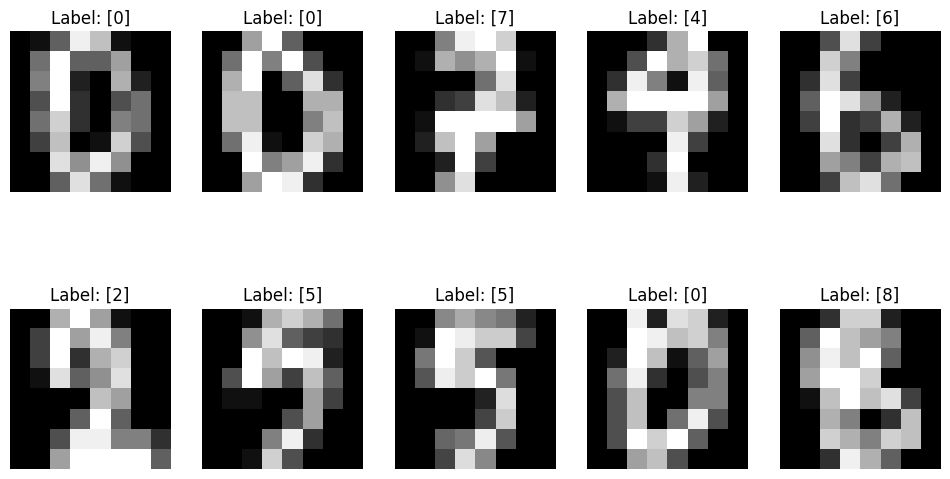

In [14]:
# Visualize some sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(X[i].reshape(8, 8), cmap='gray')
    axes[i].set_title(f'Label: {y[i]}')
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [15]:
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(X_train.shape[1],)))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))




In [16]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [17]:
model.fit(X_train, y_train, epochs=100, batch_size=128)



Epoch 1/100
36/36 [==============================] - 2s 4ms/step - loss: 2.3004 - accuracy: 0.1639
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 1.9847 - accuracy: 0.3944
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 1.4065 - accuracy: 0.6648
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 0.8635 - accuracy: 0.8405
Epoch 5/100
36/36 [==============================] - 0s 5ms/step - loss: 0.5817 - accuracy: 0.8879
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4288 - accuracy: 0.9121
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: 0.3398 - accuracy: 0.9217
Epoch 8/100
36/36 [==============================] - 0s 4ms/step - loss: 0.2906 - accuracy: 0.9331
Epoch 9/100
36/36 [==============================] - 0s 4ms/step - loss: 0.2450 - accuracy: 0.9433
Epoch 10/100
36/36 [==============================] - 0s 5ms/step - loss: 0.2239 - accuracy: 0.9419
Epoch 11/

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)



36/36 [==============================] - 0s 2ms/step - loss: 0.0694 - accuracy: 0.9813
Test accuracy: 0.9813167452812195


In [19]:
model.save('mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
